In [219]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer


In [220]:
df = pd.read_csv('../../../datasets/titanic.csv', usecols = ['Age' , 'Fare' , 'Survived'] )
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [221]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [222]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [223]:
x = df.iloc[: , 1:]
y = df.iloc[: , 0]


In [224]:
x_train ,x_test , y_train  , y_test = train_test_split(x , y , test_size= 0.2 , random_state= 42)

Text(0.5, 1.0, 'Q-Q Plot')

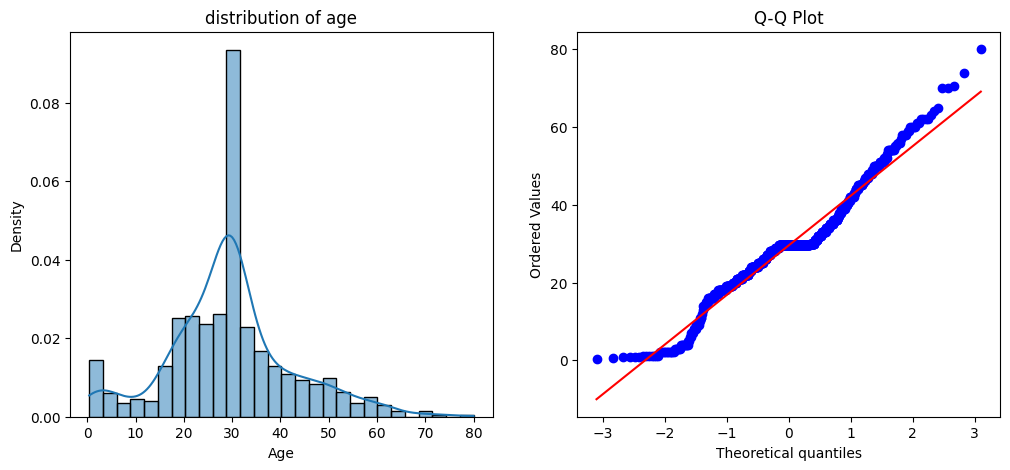

In [225]:
from scipy import stats

fig , (ax1 , ax2 ) = plt.subplots(1 ,2 , figsize = (12,5))
sns.histplot(x_train['Age'] , stat = 'density' , kde= True ,   ax = ax1) 
ax1.set_title("distribution of age")

stats.probplot(x_train['Age'] , dist = 'norm' , plot = ax2)
ax2.set_title('Q-Q Plot')




Text(0.5, 1.0, 'Q-Q Plot')

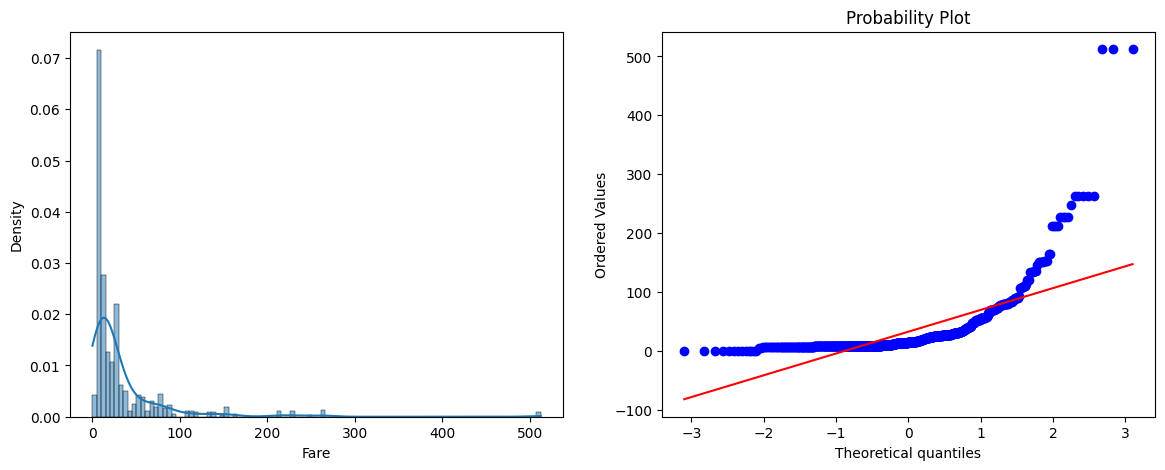

In [226]:
fig , (ax3 , ax4) = plt.subplots(1 ,2 , figsize = (14,5))
sns.histplot(x_train['Fare'] , stat = 'density' , kde= True ,   ax = ax3) 
ax1.set_title("distribution of Fare")

stats.probplot(x_train['Fare'] , dist = 'norm' , plot = ax4)
ax2.set_title('Q-Q Plot')


In [227]:
x_train['Fare'].skew()

np.float64(4.875065571137606)

In [228]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()


In [229]:
y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

In [230]:
clf.fit(x_train, y_train)
clf2.fit(x_train, y_train)

y_pred = clf.predict(x_test)
y_pred2 = clf2.predict(x_test)

print(accuracy_score(y_test , y_pred))
print(accuracy_score(y_test, y_pred2))

0.6480446927374302
0.6536312849162011


In [231]:
x_train.describe()

,Age,Fare
count,712.000000,712.000000
mean,29.538225,32.586276
std,12.994548,51.969529
min,0.420000,0.000000
25%,22.000000,7.925000
50%,29.699118,14.454200
75%,35.000000,30.500000
max,80.000000,512.329200


In [232]:
trf = FunctionTransformer(func = np.log1p)

In [233]:
x_train_transformed = trf.fit_transform(x_train[['Age', 'Fare']])
x_test_transformed = trf.fit_transform(x_test[['Age', 'Fare']])                              

In [234]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_transformed , y_train)
clf2.fit(x_train_transformed , y_train)

y_pred = clf.predict(x_test_transformed)
y_pred2 = clf2.predict(x_test_transformed)

print(accuracy_score(y_test , y_pred))
print(accuracy_score(y_test, y_pred2))



0.6815642458100558
0.6871508379888268


skewness for Fare reduced from 4.5 to 0.40 and so model accuracy increased for Logistic . Not that much impact on decision tree

0.40355441604904685


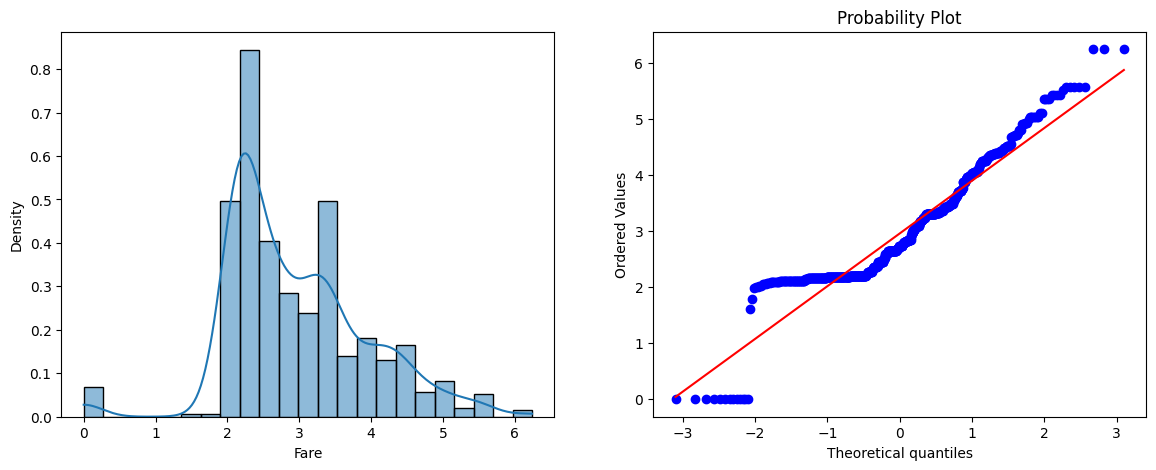

In [235]:
fig , (ax3 , ax4) = plt.subplots(1 ,2 , figsize = (14,5))
sns.histplot(x_train_transformed['Fare'] , stat = 'density' , kde= True ,   ax = ax3) 
ax1.set_title("distribution of Fare")

stats.probplot(x_train_transformed['Fare'] , dist = 'norm' , plot = ax4)
ax2.set_title('Q-Q Plot')

print(x_train_transformed['Fare'].skew())

Age skewnes went from 0.2 to -2.24 which is bad ,  log transform made age even more skewed . it was almost normal before 

-2.244630510162558


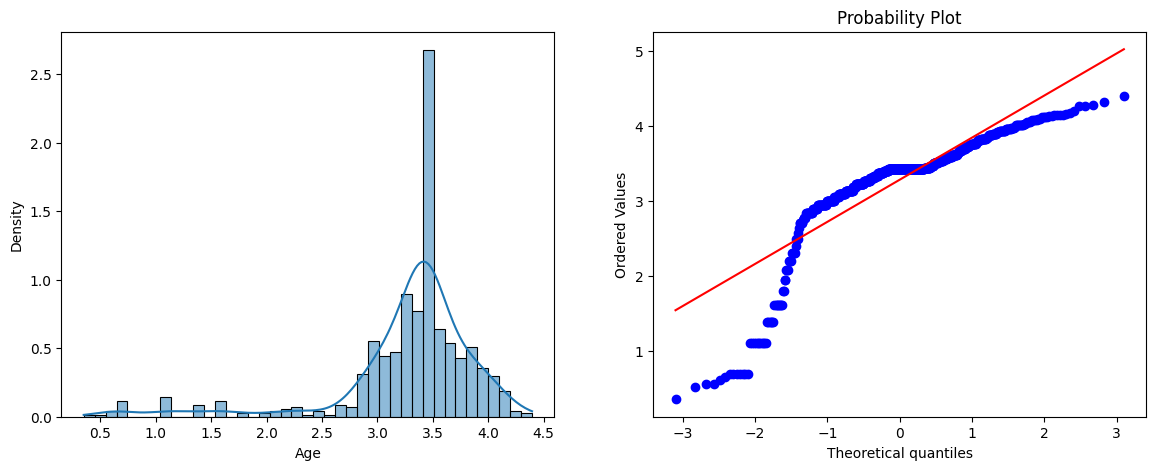

In [236]:
fig , (ax3 , ax4) = plt.subplots(1 ,2 , figsize = (14,5))
sns.histplot(x_train_transformed['Age'] , stat = 'density' , kde= True ,   ax = ax3) 
ax1.set_title("distribution of Fare")

stats.probplot(x_train_transformed['Age'] , dist = 'norm' , plot = ax4)
ax2.set_title('Q-Q Plot')

print(x_train_transformed['Age'].skew())

Trying function transformer (log1p and others) on Fare only as transformation on Age made it even worse 

In [237]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [238]:
def apply_transform(transformFunction): 
    x = df.iloc[: , 1 : 3] 
    y = df.iloc[ :  ,  0]
    trf = ColumnTransformer([('functra' , FunctionTransformer(transformFunction) , ['Fare'])] , remainder = 'passthrough')
    x_transformed = trf.fit_transform(x)

    clf = LogisticRegression()
    clf.fit(x_transformed , y)
    y_pred = clf.predict(x_transformed)

    print(accuracy_score(y , y_pred))
    print("accuracy" , np.mean(cross_val_score(clf , x_transformed , y , scoring='accuracy' , cv = 15)))

    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(x['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(x_transformed[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()


0.6711560044893379
accuracy 0.6679472693032015


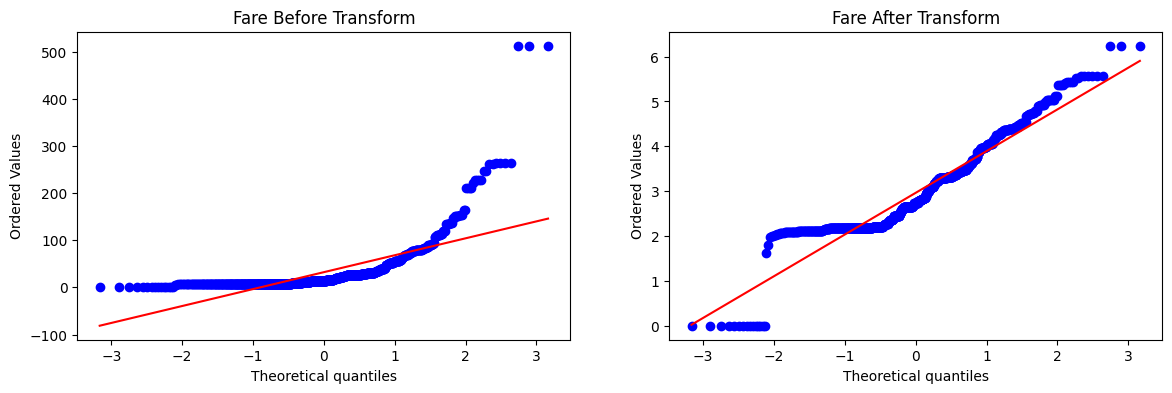

In [239]:
apply_transform(np.log1p)

0.6464646464646465
accuracy 0.6441807909604519


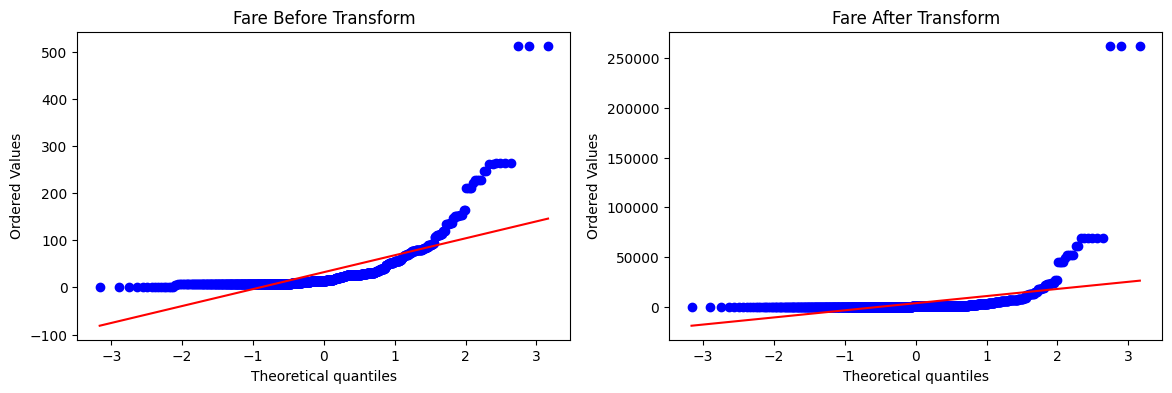

0.6161616161616161
accuracy 0.6172693032015066


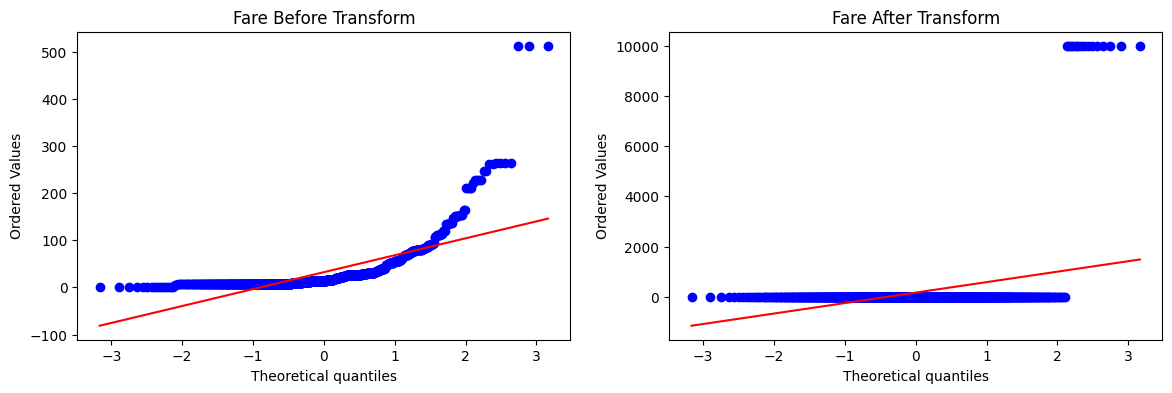

In [242]:
apply_transform(lambda x : x**2)
apply_transform(lambda x : 1/(x+0.0001))